<h3><b>Importing Libraries</b></h3>

In [52]:
# Importing Libraries
from __future__ import print_function
import os
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras import regularizers
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


<h3><b>Importing Dataset<b></h3>

In [53]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<h3><b>Preprocessing of the dataset</b></h3>

In [54]:
# Normalize the dataset
X_train = X_train/255
X_test = X_test/255

In [55]:
#Converting the testing and training dataset into float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [56]:
# Convert training and test labels to one hot matrices
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
print(y_train.shape)

(50000, 1)
(50000, 100)


<h3><b> Data Augmentation </b></h3>

In [57]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

print(y_train.shape)

(50000, 100)


<h3><b> Model Architecture </b></h3>




In [58]:
def Model():
        x_shape = [32,32,3]
        weight_decay = 0.0001
        num_classes = 100
        model = Sequential()
        model.add(Conv2D(64, (3, 3), padding='same', input_shape= x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # # model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # # model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # # model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())
        # model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        # model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        # model.add(BatchNormalization())

        # model.add(Dropout(0.5))
        model.add(Dense(num_classes))
        model.add(Dropout(0.5))
        model.add(Activation('softmax'))

        return model

<h3><b> Compile the Model </b></h3>

In [59]:
model = Model()

In [60]:

learning_rate = 0.0001
batch_size = 128
lr_decay = 1e-6
#optimization details
opt = optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_75 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_76 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_77 (Activation)   (None, 16, 16, 128)      

<h3><b> Train the Model</b></h3>

In [62]:
# Create Checkpoint and Early Stopping
checkpoint = ModelCheckpoint("vgg16_Adam_OnlyDropout.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [63]:
batch_size = 128
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),validation_data=(X_test, y_test), epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
391/391 [==============================] - ETA: 0s - loss: 4.7471 - accuracy: 0.0097
Epoch 00001: val_loss improved from inf to 4.63377, saving model to vgg16_Adam_OnlyDropout.h5
391/391 [==============================] - 33s 84ms/step - loss: 4.7471 - accuracy: 0.0097 - val_loss: 4.6338 - val_accuracy: 0.0100
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 4.6187 - accuracy: 0.0103
Epoch 00002: val_loss improved from 4.63377 to 4.61072, saving model to vgg16_Adam_OnlyDropout.h5
391/391 [==============================] - 33s 84ms/step - loss: 4.6187 - accuracy: 0.0103 - val_loss: 4.6107 - val_accuracy: 0.0100
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 4.6082 - accuracy: 0.0099
Epoch 00003: val_loss improved from 4.61072 to 4.60658, saving model to vgg16_Adam_OnlyDropout.h5
391/391 [==============================] - 33s 84ms/step - loss: 4.6082 - accuracy: 0.0099 - val_loss: 4.6066 - val_accuracy: 0.0100
Epoch 4/100
391/391 

<h3><b> Graphs</b></h3>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


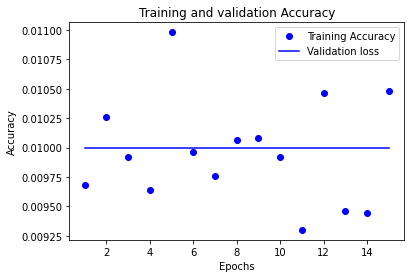

In [64]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation loss')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


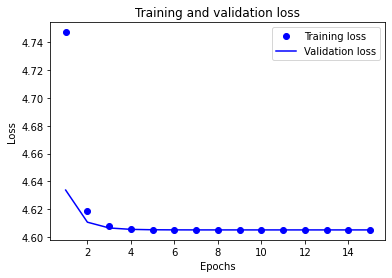

In [65]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<h3><b> Model Save and Metrics</b></h3> 

In [66]:
model1 = Model()
model1.load_weights("./vgg16_Adam_OnlyDropout.h5")
learning_rate = 0.001
batch_size = 128
lr_decay = 1e-6
#optimization details
opt = optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
# Test the model
model.predict(X_test).argmax(-1)

y_true = y_test.argmax(-1)
y_pred = model.predict(X_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.0001
Recall: 0.01
Accuracy: 0.01


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3><b> References</b></h3>

In [67]:
#https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
#https://github.com/geifmany/cifar-vgg/blob/master/cifar100vgg.py